## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Andressaach/Credit-Risk-Classification/refs/heads/main/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## Data cleaning

In [3]:
# Remove the "Unnamed: 0" column
df = df.drop(["Unnamed: 0"], axis="columns")

In [4]:
# Replaces spaces with underscores and makes them lowercase
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

## Exploratory Data Analysis

In [5]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   int64 
 3   housing           1000 non-null   object
 4   saving_accounts   817 non-null    object
 5   checking_account  606 non-null    object
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [6]:
# Checking missing values
df.isnull().sum()

age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64

In [7]:
# Number of unique values
df.nunique()

age                  53
sex                   2
job                   4
housing               3
saving_accounts       4
checking_account      3
credit_amount       921
duration             33
purpose               8
risk                  2
dtype: int64

In [8]:
# Statistical summary of numerical variables
print(df.describe())

               age          job  credit_amount     duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


# Distribution of numerical variables

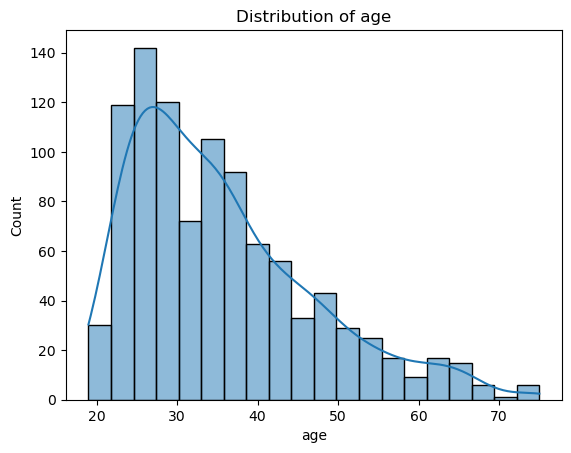

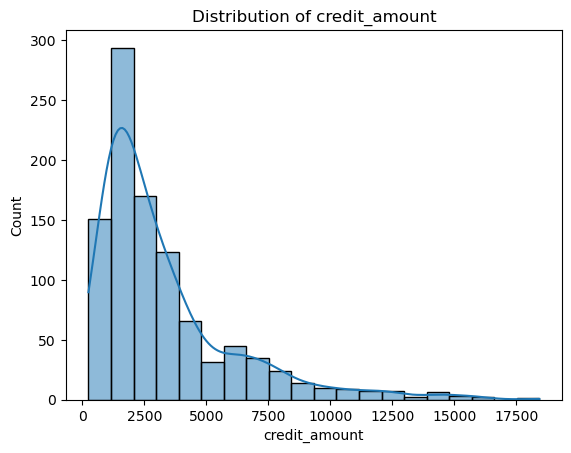

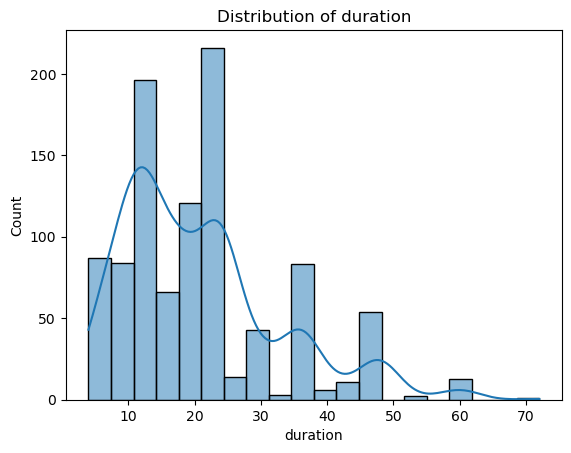

In [9]:
numeric_cols = ['age', 'credit_amount', 'duration']

for col in numeric_cols:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

- The distribution of age is right-skewed, indicating that the majority of credit applicants are younger. The distribution peaks around ages 25-30, with the number of applicants decreasing as age increases.

- The credit_amount distribution is also heavily right-skewed. This shows that most loans requested are for smaller amounts, and as the loan amount increases, the number of applicants decreases significantly.

- The distribution of duration (in months) is multimodal, meaning it has multiple peaks. The most common loan terms are around 12 months, 24 months, and 36 months, which are typical durations for consumer loans.

# Distribution of categorical variables

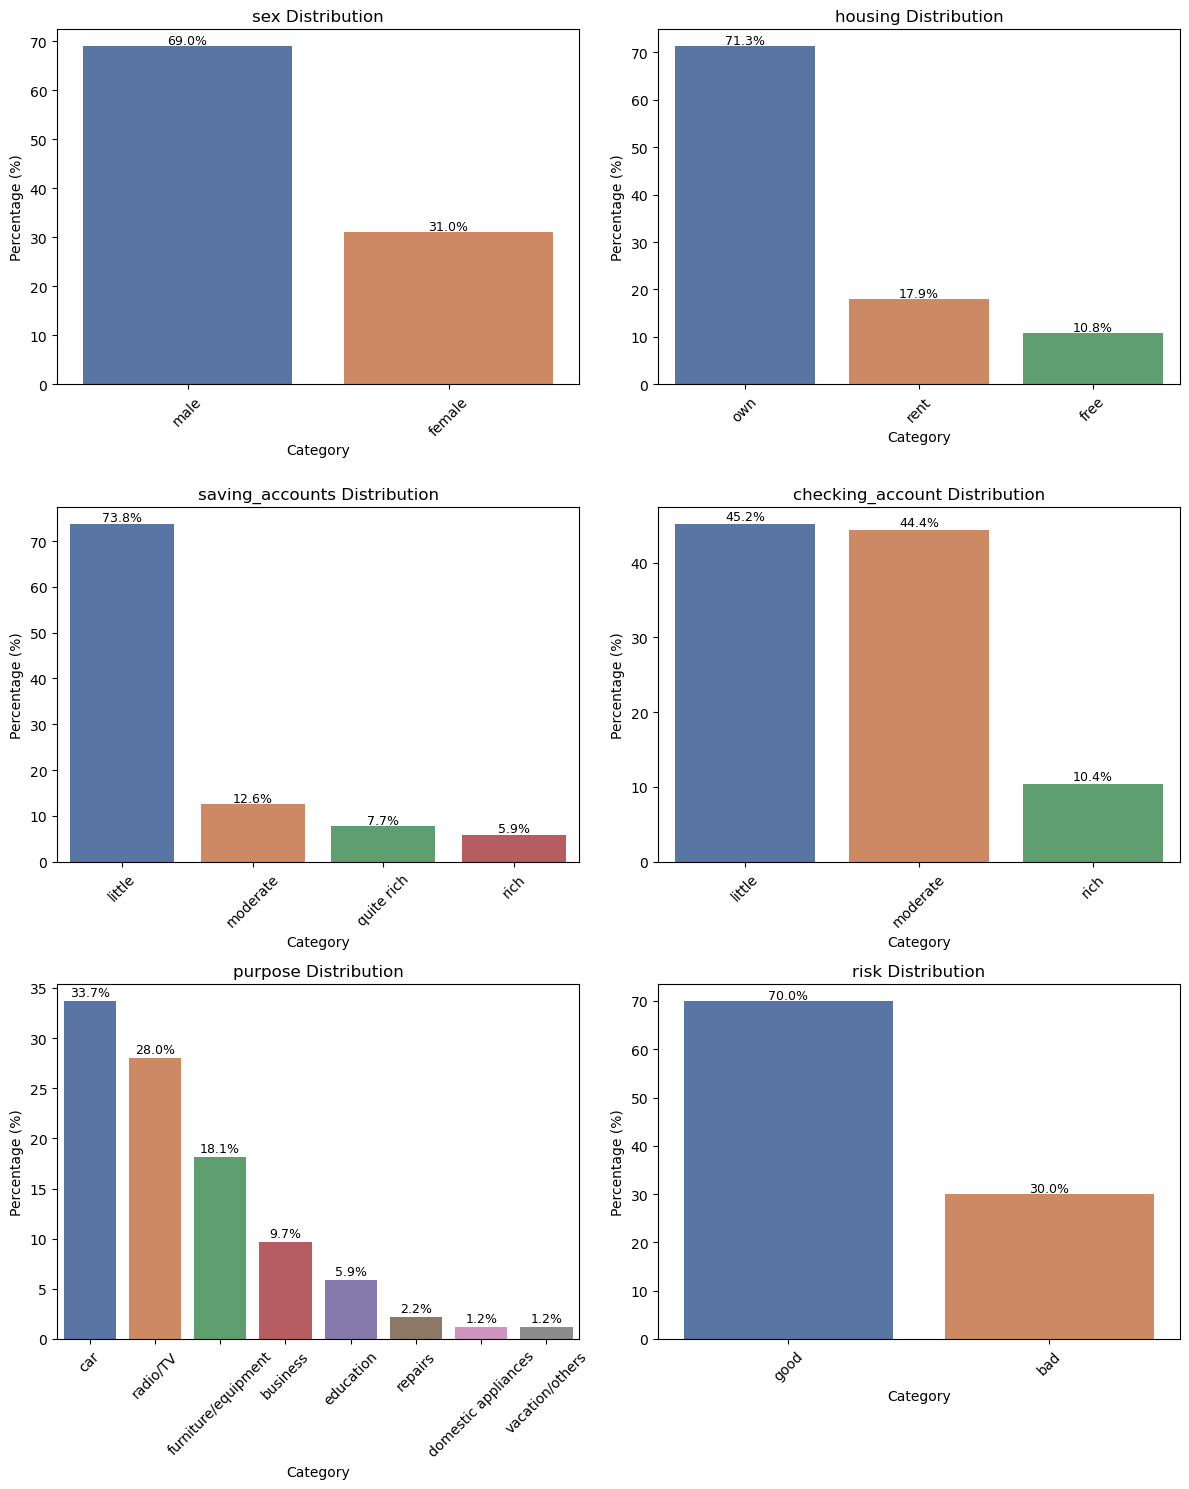

In [10]:
# Plot function for categorical variables
def categorical_plots_subplots_percent(df, max_categories_plot=10, n_cols=2):
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns    
    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))
    axes = axes.flatten()
    
    for i, column in enumerate(categorical_cols):
        counts = df[column].value_counts(normalize=True) * 100  # percentual
        top_categories = counts.head(max_categories_plot)
        
        # Plot bar chart
        sns.barplot(x=top_categories.index, y=top_categories.values, palette="deep", ax=axes[i])
        axes[i].set_title(f"{column} Distribution", fontsize=12)
        axes[i].set_xlabel("Category", fontsize=10)
        axes[i].set_ylabel("Percentage (%)", fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add percentage labels above the bars
        for j, value in enumerate(top_categories.values):
            axes[i].text(j, value + 0.5, f"{value:.1f}%", ha='center', fontsize=9)
    
    # Remove empty axes if there are fewer variables than subplots
    for k in range(i+1, len(axes)):
        fig.delaxes(axes[k])
    
    plt.tight_layout()
    plt.show()

# Apply the function
categorical_plots_subplots_percent(df, max_categories_plot=8, n_cols=2)

- Analyzing the distribution of the "risk" variable, we observe that the dataset has a higher representation of males (69%) compared to females (31%).

- For housing, most applicants own their homes (71.3%), followed by those who rent (17.9%), and a small percentage (10.8%) who live for free.

- In terms of savings, the largest group of applicants has "little" savings (73.8%). When looking at checking accounts, the distribution is more balanced, with 45.2% having a "little" balance, 44.4% a "moderate" balance, and only 10.4% having a "rich" balance.

- The most common reasons for requesting a loan are "car" (32.7%) and "radio/tv" (28%). Other purposes like "furniture/equipment" (18.1%) and "business" (9.7%) are less frequent, while "vacation/others" and "domestic appliances" are the least common.

- Finally, when analyzing the distribution of the target variable "risk," we observe that the majority of the dataset is composed of candidates with a "good" risk profile (70%), while "poor" risk profiles represent 30%. This significant imbalance is a crucial factor in building a predictive model and must be addressed, as it can lead to a model biased in predicting the majority class.

## Boxplot of numerical variables in relation to the risk variable

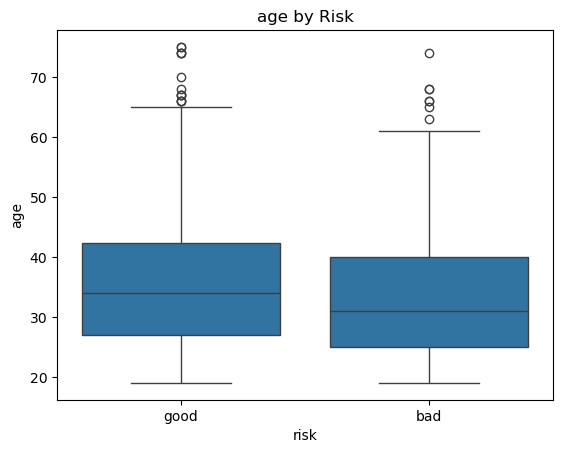

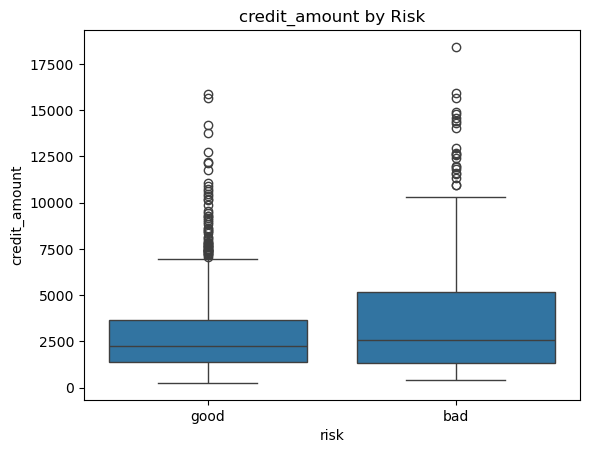

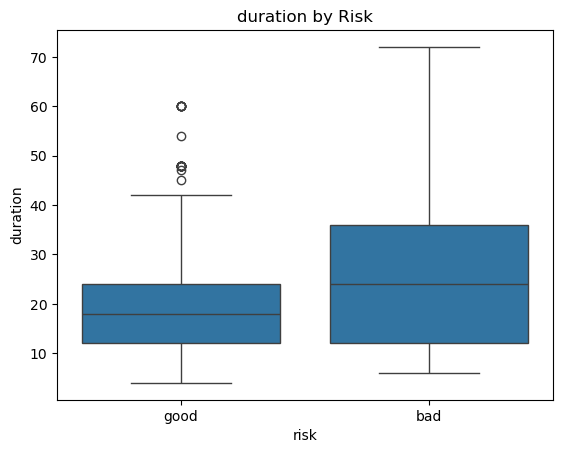

In [11]:
numeric_cols = ['age', 'credit_amount', 'duration']

for col in numeric_cols:
    sns.boxplot(x='risk', y=col, data=df)
    plt.title(f"{col} by Risk")
    plt.show()

- The median credit amount for "bad" risk applicants is higher than for "good" risk applicants. The distribution for "bad" risk loans is more spread out and higher overall, suggesting that larger loan amounts may be a factor in determining risk.

- The average loan duration is notably longer for "bad" risk applicants compared to "good" risk applicants. The boxplot for "bad" risk is shifted upwards and is wider, indicating that longer loan terms are associated with a higher likelihood of being in the "bad" risk category.

- These visualizations suggest that credit amount and loan duration have a stronger relationship with the risk outcome than age. It appears that individuals with higher credit amounts and longer loan durations are more likely to be classified as a "bad" risk.

## Save processed dataset

In [12]:
df.to_csv('german_credit_data_processed.csv', index=False, encoding='utf-8')